## Author: Chobi Rani Sahu

# **Rock vs Mine Prediction**

In this project, our main objective is to predict whether an object detected by a submarine is an underwater rock or a man-made object like mine based on Sonar data. The steps followed to complete the task are:

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Importing Data

In [2]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('Sonar.csv', header=None)
print("Data imported successfully")

Data imported successfully


In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### 3. Exploring the Data

In [4]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M --> Mine

R --> Rock

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### 4. Data Visualization
Let's look at visualizations of individual attributes. It is often useful to look at our data using multiple different visualizations in order to spark ideas. Let's look at histograms of each attribute to get a sense of the data distributions.

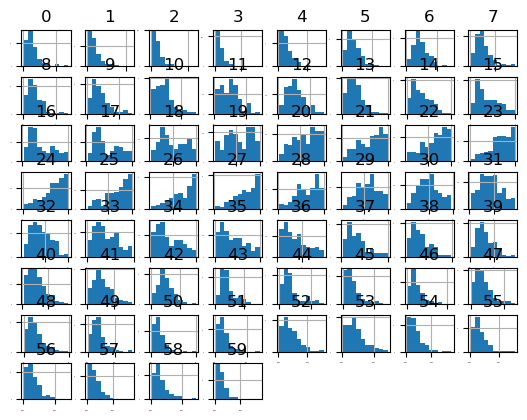

In [9]:
# histograms
sonar_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other attributes.

Let's take a look at the same perspective of the data using density plots.

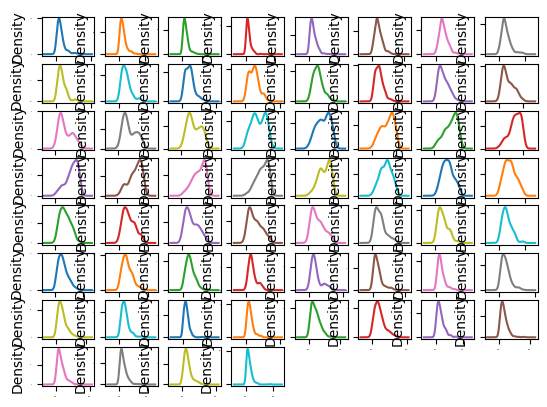

In [10]:
# density
sonar_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=0.2)
plt.show()


i. We can see that many of the attributes have a skewed distribution.\
ii. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.\
It is always good to look at box and whisker plots of numeric attributes to get an idea of the spread of values.

<AxesSubplot:>

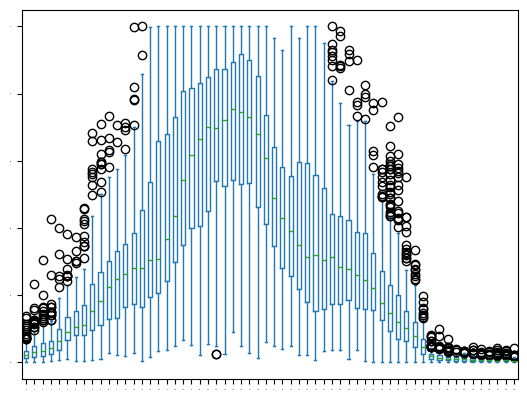

In [11]:
# box and whisker plots
sonar_data.plot(kind='box', layout=(8,8), sharex=False, sharey=False, fontsize=1)

We can see that attributes do have quite different spreads. Given the scales are the same, it may suggest some benefit in standardizing the data for modeling to get all of the means lined up.

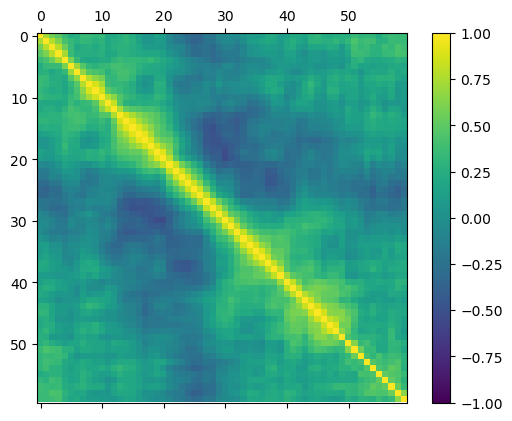

In [12]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar_data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


i. It looks like there is also some structure in the order of the attributes.\
ii. The yellow around the diagonal suggests that attributes that are next to each other are generally more correlated with each other.\
iii. The purple patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering.\
iv. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

### 5. Preparing the data

Dividing the data into attributes(inputs) and labels(outputs).

In [13]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [14]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

### 6. Splitting the data for model building

Splitting the data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [17]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

### 7. Evaluating the Algorithms

We don't know what algorithms will do well on this dataset. Binary classification algorithms like Logistic Regression and distanced based algorithms K-Nearest Neighbors and Support Vector Machines may do well. Let's design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
results = []
names = []
num_folds = 10
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.797076 (0.050564)
LDA: 0.731579 (0.083082)
KNN: 0.770175 (0.062346)
CART: 0.764912 (0.076059)
NB: 0.700877 (0.090842)
SVM: 0.785088 (0.078972)


The results suggest that Logistic Regression, Support Vector Machines and K-Nearest Neighbors may be worth further study.

These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.

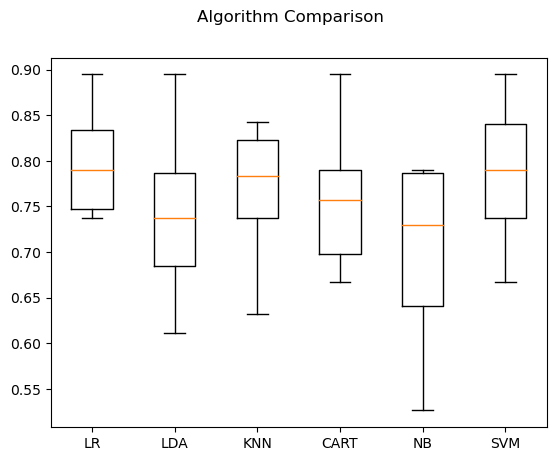

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for logistic Regression which is encouraging, suggesting low variance.\
It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms such as SVM.In the next section we will repeat this spot-check with a standardized copy of the training dataset.

### 8. Evaluating the Algorithms: Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [22]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.780409 (0.038801)
ScaledLDA: 0.731579 (0.083082)
ScaledKNN: 0.806433 (0.080149)
ScaledCART: 0.764912 (0.082643)
ScaledNB: 0.700877 (0.090842)
ScaledSVM: 0.828655 (0.066358)



i. We can see that KNN is doing well, even better than before.\
ii. We can also see that the standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.\
Again, we should plot the distribution of the accuracy scores using box and whisker plots.

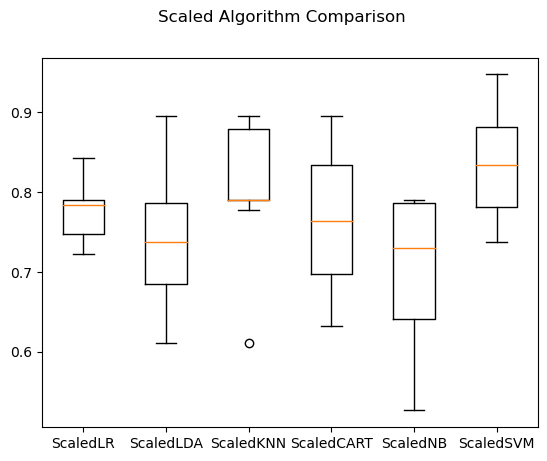

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


i. The results suggest digging deeper into the KNN and SVM algorithms.\
ii. It is very likely that configuration beyond the default may yield even more accurate models.

### 9. Algorithm Tuning
In this section we investigate tuning the parameters for two algorithms that show promise from the spot-checking in the previous section: KNN and SVM.

### 9.1 Tuning KNN

In [24]:
# Tune scaled KNN
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849708 using {'n_neighbors': 1}
0.849708 (0.073893) with: {'n_neighbors': 1}
0.843860 (0.068936) with: {'n_neighbors': 3}
0.795906 (0.070767) with: {'n_neighbors': 5}
0.790936 (0.074343) with: {'n_neighbors': 7}
0.769591 (0.076066) with: {'n_neighbors': 9}
0.747661 (0.074822) with: {'n_neighbors': 11}
0.752924 (0.076139) with: {'n_neighbors': 13}
0.710526 (0.078175) with: {'n_neighbors': 15}
0.726608 (0.081968) with: {'n_neighbors': 17}
0.716374 (0.075209) with: {'n_neighbors': 19}
0.716374 (0.078806) with: {'n_neighbors': 21}


We can see that the optimal configuration is K=1. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

### 9.2 Tuning SVM

In [25]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882164 using {'C': 2.0, 'kernel': 'rbf'}
0.817836 (0.059753) with: {'C': 0.1, 'kernel': 'linear'}
0.619298 (0.143833) with: {'C': 0.1, 'kernel': 'poly'}
0.571345 (0.117522) with: {'C': 0.1, 'kernel': 'rbf'}
0.748538 (0.079336) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.790936 (0.070966) with: {'C': 0.3, 'kernel': 'linear'}
0.726608 (0.093597) with: {'C': 0.3, 'kernel': 'poly'}
0.758480 (0.085630) with: {'C': 0.3, 'kernel': 'rbf'}
0.764620 (0.068076) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.768713 (0.086793) with: {'C': 0.5, 'kernel': 'linear'}
0.769883 (0.068224) with: {'C': 0.5, 'kernel': 'poly'}
0.775146 (0.074838) with: {'C': 0.5, 'kernel': 'rbf'}
0.764912 (0.041438) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.769298 (0.069937) with: {'C': 0.7, 'kernel': 'linear'}
0.802339 (0.086088) with: {'C': 0.7, 'kernel': 'poly'}
0.807018 (0.079884) with: {'C': 0.7, 'kernel': 'rbf'}
0.759357 (0.048401) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.769298 (0.051721) with: {'C': 0.9, 'kernel': 'linear'

i. We can see the most accurate configuration was SVM with an RBF kernel and a C value of 2.\
ii. The accuracy 88.2164% is seemingly better than what KNN could achieve.

### 10. Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

i. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).\
ii. Bagging Methods: Random Forests (RF) and Extra Trees (ET).\
We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.786842 (0.061701)
GBM: 0.856725 (0.065695)
RF: 0.792105 (0.071173)
ET: 0.855263 (0.049054)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%) with default configurations.\
We can plot the distribution of accuracy scores across the cross validation folds.

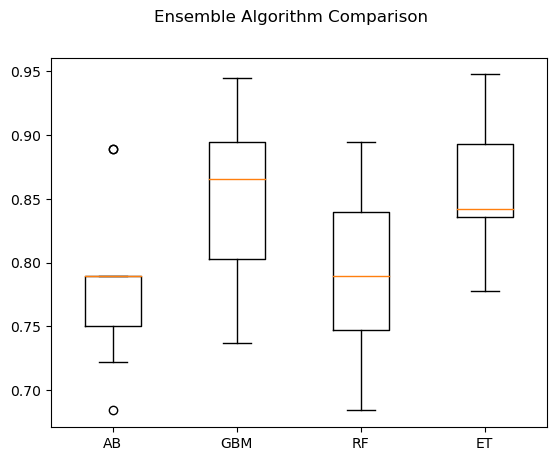

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest ET may be worthy of further study, with a strong mean and a spread that skews up towards high 80s (%) in accuracy.

### 11. Finalizing the Model

The SVM showed the most promise as a low complexity and stable model for this problem. In this section we will finalize the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm our findings. A part of the findings was that SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9047619047619048
[[10  1]
 [ 1  9]]
              precision    recall  f1-score   support

           M       0.91      0.91      0.91        11
           R       0.90      0.90      0.90        10

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



We can see that we achieve an accuracy of 90% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM.

### 12. Making a Predictive System

In [29]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')


['M']
The object is a Mine


## Conclusion
In this task we successfully created and implemented a Support Vector Model to predict whether an object detected by a submarine is an underwater rock or a man-made object like mine based on Sonar data. According to this Support Vector Model having an Accuracy score of 90%.